# **Начало**

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
#df_original = pd.read_excel('/content/drive/MyDrive/content/electronika_03_04.xlsx')
df_original = pd.read_excel('/Users/yana/Downloads/electronics.xlsx')

# **Подготовка данных**

In [4]:
df = df_original.copy()

In [5]:
df.columns

Index(['Order_ID', 'Email_new', 'Phone_new', 'Source', 'OrderDate', 'время',
       'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Status',
       'Status_ID', 'OneClick', 'CancelReason', 'Actions', 'DeliveryType',
       'PaymentType', 'Region', 'Area', 'Store_ID', 'FullSum', 'Discount',
       'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Nom_Name', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'Brand', 'TN', 'TK', 'NomFullPath',
       'Week', 'Nom_ID'],
      dtype='object')

In [6]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column       |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type      |
|--------------+----------------+---------------+--------------+-------------+----------------|
| Order_ID     |         166794 |             0 |            0 |         0   | object         |
| Email_new    |          99284 |         61516 |            0 |         0   | object         |
| Phone_new    |         123135 |          7575 |            0 |         0   | object         |
| Source       |              4 |             0 |            0 |         0   | object         |
| OrderDate    |             61 |             0 |            0 |         0   | datetime64[ns] |
| время        |          58549 |             0 |            0 |         0   | object         |
| месяц        |              2 |             0 |            0 |         0   | int64          |
| ChangeDate   |         155189 |             0 |            0 |         0   | object         |
| DeliveryDate |            100 |       

In [7]:
#удаление столбца Email_new.
df = df.drop(columns=['Email_new'])

In [8]:
#удаление строк с нулевыми номерами телефонов.
df = df.loc[df['Phone_new'] != 0]

In [9]:
#удаляем чеки, в которых присутствуют отрицательные скидки (возможные ошибки системы)
df = df.loc[~df['Order_ID'].isin(['5429143_BX', '5581960_BX', '5826714_BX'])]

In [10]:
#удаляем строки с нулевыми значениями RowSum, т.к. нам не нужны "бесплатные" товары
df = df.loc[df['RowSum'] != 0]

In [11]:
df.shape

(200233, 36)

In [12]:
#посмотрим долю скидки от реальной стоимости по товарам, записываем в дополнительно созданный столбец DiscountPercent
#df['DiscountPercent'] = df['RowDiscount'] / (df['RowSum'] + df['RowDiscount'])

In [13]:
#удаляем строки со скидкой более 90%
#df = df.loc[df['DiscountPercent'] < 0.9]

In [14]:
df.shape

(200233, 36)

In [15]:
df.shape

(200233, 36)

In [16]:
columns_to_remove = [
    'Row_ID', 'Articul', 'Nom_ID', 'Status_ID', 'Discount',
    'Brand', 'NomFullPath', 'RowDiscount', 'Actions', 'ChangeDate', 'время']

df = df.drop(columns=columns_to_remove)

In [17]:
df.shape

(200233, 25)

In [18]:
#ищем в столбце NomGroup все услуги (при этом создаем вспомогательный датафрейм со значениями, содержащими "услуг")
df_1= df[df['NomGroup'].str.contains('услуг', regex=False, case=False, na=False)]
df_1.NomGroup.unique()

array(['Услуги'], dtype=object)

In [19]:
#удаляем товары из категории NomGroup - Услуги
df = df.loc[df['NomGroup'] != 'Услуги']
df = df.loc[df['TN'] != 'Услуги']

In [20]:
df.shape

(199771, 25)

In [21]:
#по столбцу NomGroup удаляем все доставки
df_2= df[df['NomGroup'].str.contains('достав', regex=False, case=False, na=False)]
df_2.NomGroup.unique()

array(['Доставка'], dtype=object)

In [22]:
df.shape

(199771, 25)

In [23]:
#Столбцы Region перезаполняем наименованиями соответствующих федеральных округов

df['Region'] = df['Region'].replace(['Москва', 'Белгород', 'Владимир', 'Воронеж', 'Иваново', 'Калуга', 'Кострома', 'Курск', 'Липецк', 'Люберцы', 'Мытищи',
                                     'Подольск', 'Рязань', 'Сергиев Посад', 'Серпухов', 'Смоленск', 'Тамбов', 'Тверь', 'Тула', 'Ярославль'], 'Центральный ф.о.')
df['Region'] = df['Region'].replace(['Великий Новгород', 'Вологда', 'Воркута', 'Всеволожск', 'Выборг', 'Гатчина', 'Кингисепп', 'Кириши', 'Колпино', 'Мурманск',
                                     'Петрозаводск', 'Псков', 'Пушкин', 'Санкт-Петербург', 'Тихвин', 'Череповец'], 'Северо-Западный ф.о.')
df['Region'] = df['Region'].replace(['Ижевск', 'Казань', 'Набережные Челны', 'Нижний Новгород', 'Новокуйбышевск', 'Пенза', 'Пермь', 'Самара', 'Саратов',
                                     'Тольятти', 'Ульяновск', 'Уфа', 'Чебоксары'], 'Приволжский ф.о.')
df['Region'] = df['Region'].replace(['Барнаул', 'Горно-Алтайск', 'Иркутск', 'Кемерово', 'Красноярск', 'Новокузнецк', 'Новосибирск', 'Омск', 'Томск'], 'Сибирский ф.о.')
df['Region'] = df['Region'].replace(['Волгоград', 'Краснодар', 'Новочеркасск', 'Пятигорск', 'Ростов-на-Дону', 'Сочи', 'Ставрополь'], 'Южный ф.о.')
df['Region'] = df['Region'].replace(['Екатеринбург', 'Нижневартовск', 'Нижний Тагил', 'Ноябрьск', 'Сургут', 'Тюмень', 'Челябинск'], 'Уральский ф.о.')

In [24]:
df['Region'] = df['Region'].replace({'Владивосток': 'Дальневосточный ф.о.'})

In [25]:
df.Region.unique()

array(['Центральный ф.о.', 'Северо-Западный ф.о.', 'Сибирский ф.о.',
       'Приволжский ф.о.', 'Уральский ф.о.', 'Южный ф.о.',
       'Дальневосточный ф.о.', nan], dtype=object)

In [26]:
df.shape

(199771, 25)

In [27]:
#промежуточный просмотр наших данных после произведенных преобразований

def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data_1 = []
for column in df:
    data_1.append([column] + columnValues(df[column]))

print(tabulate(data_1, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column       |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type      |
|--------------+----------------+---------------+--------------+-------------+----------------|
| Order_ID     |         162979 |             0 |            0 |         0   | object         |
| Phone_new    |         123023 |             0 |            0 |         0   | object         |
| Source       |              4 |             0 |            0 |         0   | object         |
| OrderDate    |             61 |             0 |            0 |         0   | datetime64[ns] |
| месяц        |              2 |             0 |            0 |         0   | int64          |
| DeliveryDate |            100 |             0 |            0 |         0   | object         |
| PaymentDate  |         102499 |             0 |            0 |         0   | object         |
| Status       |             14 |             0 |            0 |         0   | object         |
| OneClick     |              2 |       

In [28]:
#выгрузка предварительной таблицы
#df.to_excel('df_first.xlsx', index=False)

In [29]:
df_3= df[df['Nom_Name'].str.contains('устан', regex=False, case=False, na=False)]
df_3.Nom_Name.unique()

array(['Подкл.стир.,посудом.машин станд.устан.',
       'Станд.установ.газ.плиты отдельностоящей',
       'Установка холод.б/дораб.коммун+перев.дв',
       'Установка напольного унитаза', 'Станд.установ.дух шкафа газ.',
       'Станд.установ.вар.поверх.газ.',
       'Подкл.накоп.водонаг.бол.30л ст.устан',
       'Установка Bosch PLS 300+PTC 1 0603B04100',
       'Станд.установ.кондиц.(модели 5,7,9,10)',
       'Установочный набор Mystery MAK 2.08',
       'Установка смесителя на гибкой подводке',
       'Фигурка Schleich Черный мустанг на дыбах',
       'Станд.установ.кондиц.(модели 12,13,14)'], dtype=object)

In [30]:
#These rows represent installation services rather than physical products.

In [31]:
df = df.loc[~df['Nom_Name'].isin(['Подкл.стир.,посудом.машин станд.устан.',
       'Станд.установ.газ.плиты отдельностоящей',
       'Установка холод.б/дораб.коммун+перев.дв',
       'Установка напольного унитаза', 'Станд.установ.дух шкафа газ.',
       'Станд.установ.вар.поверх.газ.',
       'Подкл.накоп.водонаг.бол.30л ст.устан',
       'Установка Bosch PLS 300+PTC 1 0603B04100',
       'Станд.установ.кондиц.(модели 5,7,9,10)',
       'Установочный набор Mystery MAK 2.08',
       'Установка смесителя на гибкой подводке',
       'Станд.установ.кондиц.(модели 12,13,14)'])]

In [32]:
df.shape

(199438, 25)

In [33]:
df_4= df[df['Nom_Name'].str.contains('подк', regex=False, case=False, na=False)]
df_4.Nom_Name.unique()

array(['Крепление LCD-телевизора на стену, подключение, настройка и сортировка каналов (размер диагонали 33-40")',
       'Подкл.стир.,посудом.машин с частич.дораб',
       'Подкл.встр.СМА,ПМ/маш к готов.коммун', 'Подкл. варочной панели',
       'Подкл. духового шкафа',
       'Подкл.холодильника: б/дораб.коммуникаций',
       'Подкл.СМА,посудом.с доработкой сантех',
       'Подкл. эл.плиты отдельностоящей',
       'Подкл.встр.СМА,ПМ/маш с дораб.сантех+эл',
       'Подключение GROHE Euphoria Cube 27704000',
       'Подкл.холодSide by Side б/дораб.комНДС0%',
       'Подкл.СМА,посудом.с дораб.сантех+электр.',
       'Подкл.варочной панели и духового шкафа',
       'Подкл. холодильника встраив.',
       'Подкл.накоп.водонаг.до 30л к готов.ком',
       'Подкл.накоп.водонаг.бол.30л с дораб',
       'Подкл.накоп.водонаг.до 30л с доработк.',
       'Крепление LCD-телевизора на стену, подключение, настройка и сортировка каналов (размер диагонали 41-47")',
       'Подключение GROHE Relexa 28628

In [34]:
df = df.loc[~df['Nom_Name'].isin(['Подкл.стир.,посудом.машин с частич.дораб',
       'Подкл.встр.СМА,ПМ/маш к готов.коммун', 'Подкл. варочной панели',
       'Подкл. духового шкафа',
       'Подкл.холодильника: б/дораб.коммуникаций',
       'Подкл.СМА,посудом.с доработкой сантех',
       'Подкл. эл.плиты отдельностоящей',
       'Подкл.встр.СМА,ПМ/маш с дораб.сантех+эл',
       'Подключение GROHE Euphoria Cube 27704000',
       'Подкл.СМА,посудом.с дораб.сантех+электр.',
       'Подкл.варочной панели и духового шкафа',
       'Подкл. холодильника встраив.',
       'Крепление LCD-телевизора на стену, подключение, настройка и сортировка каналов (размер диагонали 41-47")',
       'Подкл.накоп.водонаг.до 30л с доработк.',
       'Подключение GROHE Relexa 28628000',
       'Подкл.накоп.водонаг.бол.30л с дораб',
       'Подкл.холод Side by Side дораб.коммун.',
       'Подключение GROHE Relexa 28671000',
       'Подключение стиральной машины (Эконом)',
       'Крепление LCD-телевизора на стену, подключение, настройка и сортировка каналов (размер диагонали 33-40")'])]

In [35]:
df.shape

(199186, 25)

In [36]:
df_5= df[df['Nom_Name'].str.contains('сборк', regex=False, case=False, na=False)]
df_5.Nom_Name.unique()

array(['Сборка мебели от стоимости от 0-12000',
       'Сборка мебели от стоимости от 12001-24000',
       'Сборка мебели и тумб для ПК и ТВ'], dtype=object)

In [37]:
df = df.loc[~df['Nom_Name'].isin(['Сборка мебели от стоимости от 0-12000',
       'Сборка мебели от стоимости от 12001-24000',
       'Сборка мебели и тумб для ПК и ТВ'])]

In [38]:
df.shape

(199148, 25)

In [39]:
df_6= df[df['Nom_Name'].str.contains('сервис', regex=False, case=False, na=False)]
df_6.Nom_Name.unique()

array(['Программа дополнительного сервисного обслуживания Сервис + на 2 года',
       'Программа дополнительного сервисного обслуживания Сервис + на 1 год',
       'Программа дополнительного сервисного обслуживания Сервис + на 3 года',
       'Сервис+2.0 на 1 год', 'Сервис+2.0 на 2 года',
       'Сервис+2.0 на 3 года'], dtype=object)

In [40]:
df = df.loc[~df['Nom_Name'].isin(['Программа дополнительного сервисного обслуживания Сервис + на 2 года',
       'Программа дополнительного сервисного обслуживания Сервис + на 1 год',
       'Программа дополнительного сервисного обслуживания Сервис + на 3 года',
       'Сервис+2.0 на 1 год', 'Сервис+2.0 на 2 года',
       'Сервис+2.0 на 3 года'])]

In [41]:
df.shape

(198447, 25)

In [42]:
df_7= df[df['Nom_Name'].str.contains('настро', regex=False, case=False, na=False)]
df_7.Nom_Name.unique()

array(['Крепление LCD-телевизора на стену без настройки и сортировки каналов (размер диагонали 41-47")',
       'Набор Bonita Настроение 20100212661',
       'Настройка LCD-телевизора, сортировка каналов',
       'Крепление LCD-телевизора на стену без настройки и сортировки каналов (размер диагонали 48-55")'],
      dtype=object)

In [43]:
df_8= df[df['Nom_Name'].str.contains('поли', regex=False, case=False, na=False)]
df_8.Nom_Name.unique()

array(['Полировщик Bellissima 5154 д/ногтей',
       'Игрушка SIKU Тягач с вертолетом. полиц.',
       'Каталка Italtrike Полицейская машина гол',
       'Полис Ринко "Защита МАКС"',
       'Набор Welly Военно-полицейская команда',
       'Игра Hasbro Монополия всемирная',
       'Машина р/у DICKIE Полицейский патруль бг',
       'Сумка Targus TBS045EU 16" полиэстер',
       'Сумка Targus TSS124EU 16" полиэстер', 'КПБ Нежность Полина 1502',
       'Игра Hasbro Монополия Миллионер',
       'Игра Hasbro Моя первая монополия'], dtype=object)

In [44]:
df = df.loc[~df['Nom_Name'].isin(['Настройка LCD-телевизора, сортировка каналов',
       'Крепление LCD-телевизора на стену без настройки и сортировки каналов (размер диагонали 48-55")',
       'Крепление LCD-телевизора на стену без настройки и сортировки каналов (размер диагонали 41-47")',
       'Полис Ринко "Защита МАКС"'])]

In [45]:
df.shape

(198425, 25)

In [46]:
#после просмотра получившейся таблицы выявлены еще несколько услуг, которые можно исключить
df_9= df[df['Nom_Name'].str.contains('гарант', regex=False, case=False, na=False)]
df_9.Nom_Name.unique()

array(['"Гарант +" - Договор страхования, обеспечивающий защиту техники от негарантийной поломки, механического повреждения',
       '«Гарант +» - Договор страхования, обеспечивающий защиту техники от негарантийной поломки, механического повреждения'],
      dtype=object)

In [47]:
df_10= df[df['Nom_Name'].str.contains('навес', regex=False, case=False, na=False)]
df_10.Nom_Name.unique()

array(['Навес вытяжки кам.типа б/воздуховода',
       'Навес вытяжки встраив. б/воздуховода',
       'Навес вытяжки плоской б/воздуховода'], dtype=object)

In [48]:
df_11= df[df['Nom_Name'].str.contains('монтаж', regex=False, case=False, na=False)]
df_11.Nom_Name.unique()

array(['Лента Scotch 411-Med-RU монтажная',
       'АКЦИЯ! Монтаж спутниковой антенны до 89см на балкон'],
      dtype=object)

In [49]:
df = df.loc[~df['Nom_Name'].isin(['Гарантийный талон Bosch (эл.инструмент)',
       '«Гарант +» - Договор страхования, обеспечивающий защиту техники от негарантийной поломки, механического повреждения',
       'Навес вытяжки кам.типа б/воздуховода', 'Навес вытяжки встраив. б/воздуховода',
       'Навес вытяжки плоской б/воздуховода', 'АКЦИЯ! Монтаж спутниковой антенны до 89см на балкон'])]

In [50]:
df.shape

(198400, 25)

In [51]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data_3 = []
for column in df:
    data_3.append([column] + columnValues(df[column]))

print(tabulate(data_3, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column       |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type      |
|--------------+----------------+---------------+--------------+-------------+----------------|
| Order_ID     |         162966 |             0 |            0 |         0   | object         |
| Phone_new    |         123020 |             0 |            0 |         0   | object         |
| Source       |              4 |             0 |            0 |         0   | object         |
| OrderDate    |             61 |             0 |            0 |         0   | datetime64[ns] |
| месяц        |              2 |             0 |            0 |         0   | int64          |
| DeliveryDate |            100 |             0 |            0 |         0   | object         |
| PaymentDate  |         102492 |             0 |            0 |         0   | object         |
| Status       |             14 |             0 |            0 |         0   | object         |
| OneClick     |              2 |       

In [52]:
df.head()

,Order_ID,Phone_new,Source,OrderDate,месяц,DeliveryDate,PaymentDate,Status,OneClick,CancelReason,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,IM_Rozn_Sum,Nom_Name,NomGroup,Quant,RowPrice,RowSum,TN,TK,Week
1,1303000509_TT,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,201603,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,0,Тестовый заказ,Самовывоз,Наличные,Центральный ф.о.,Москва,3066,39519.00,39519.00,"""Гарант +"" - Договор страхования, обеспечивающ...",Гарант +,1.0,3520.0,3520.0,NaN,NaN,13.0
2,1303000509_TT,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,201603,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,0,Тестовый заказ,Самовывоз,Наличные,Центральный ф.о.,Москва,3066,39519.00,39519.00,Телевизор LED Samsung UE-40J6200AU Smart,Smart телевизоры,1.0,35999.0,35999.0,ТВ-Аудио,Телевизоры LCD,13.0
3,1303000510_TT,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,201603,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,0,Тестовый заказ,Курьерская,Наличные,Центральный ф.о.,Москва,2189,96665.66,96665.66,"Доставка ""Стандарт"" зона 0",Доставка,1.0,490.0,490.0,NaN,NaN,13.0
7,1303000510_TT,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,201603,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,0,Тестовый заказ,Курьерская,Наличные,Центральный ф.о.,Москва,2189,96665.66,96665.66,Телевизор LED Sony KDL-40R553C Smart,Smart телевизоры,2.0,32999.0,65998.0,ТВ-Аудио,Телевизоры LCD,13.0
8,1303000510_TT,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,201603,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,0,Тестовый заказ,Курьерская,Наличные,Центральный ф.о.,Москва,2189,96665.66,96665.66,Антенна РЭМО Интер 2.0 белый,Антенны,2.0,999.0,1998.0,Аксессуары,Аксессуары ТВ-Аудио,13.0


**Анализ удаленных товаров**

In [53]:
# Фильтрация дешевых товаров (дешевле 200 рублей)
cheap_items = df[df['RowPrice'] < 200]
print("Категории дешевых товаров:")
print(cheap_items['NomGroup'].value_counts())

Категории дешевых товаров:
NomGroup
Доставка                             3521
Велоаксессуары                        205
Крышки для посуды                     173
Гантели                               117
Лампочки и аксессуары                 105
                                     ... 
Уровни и измерительный инструмент       1
Карт-ридеры                             1
Щипцы кулинарные                        1
Apple iPhone                            1
Гладильные доски                        1
Name: count, Length: 156, dtype: int64


In [54]:
# Анализ клиентов, которые покупают дешевые товары
customer_behavior = df.groupby('Phone_new').agg(
    total_orders=('Order_ID', 'nunique'),  # Количество заказов
    cheap_items_count=('RowPrice', lambda x: (x < 200).sum())  # Количество дешевых товаров
).reset_index()

In [55]:
# Клиенты, которые покупают дешевые товары
print("Клиенты с дешевыми товарами:")
print(customer_behavior[customer_behavior['cheap_items_count'] > 0])

Клиенты с дешевыми товарами:
                       Phone_new  total_orders  cheap_items_count
14       55485656-57565656575275           255                  3
16      55494949-494949494949715             2                  1
18      55495052-535454565648775             1                  1
37      55525753-545354575151765             1                  1
75       55555750-53535149574979           330                 13
...                          ...           ...                ...
122995   56575351-4956535152488й             1                  1
122997   56575449-48564955544983             1                  1
123009   57495456-56485151574991             1                  1
123013   57505457-48525657515799             1                  1
123017   57555656-55575253555698             1                  1

[5139 rows x 3 columns]


In [56]:
# Доля дешевых товаров в заказах
df['is_cheap'] = df['RowPrice'] < 200  # Добавляем флаг для дешевых товаров
order_cheap_share = df.groupby('Order_ID')['is_cheap'].mean().reset_index()
print("Доля дешевых товаров в заказах:")
print(order_cheap_share.describe())

Доля дешевых товаров в заказах:
            is_cheap
count  162966.000000
mean        0.021333
std         0.119139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


In [57]:
# Анализ повторных покупок по категориям дешевых товаров
repeat_purchases = df.groupby(['Phone_new', 'NomGroup']).size().reset_index(name='PurchaseCount')
repeat_purchases = repeat_purchases[repeat_purchases['PurchaseCount'] > 1]  # Только повторные покупки

In [58]:
# Какие категории дешевых товаров покупаются повторно
cheap_repeats = repeat_purchases[repeat_purchases['NomGroup'].isin(cheap_items['NomGroup'].unique())]
print("Категории дешевых товаров с повторными покупками:")
print(cheap_repeats['NomGroup'].value_counts())

Категории дешевых товаров с повторными покупками:
NomGroup
Доставка                       705
Чайники электрические          377
Велоаксессуары                 233
Apple iPhone                   221
Аксессуары для биотуалетов     189
                              ... 
Номенклатура к обработке         1
Швейные аксессуары               1
Аксессуары для поверхностей      1
Предметы ухода за детьми         1
Чайники заварочные               1
Name: count, Length: 140, dtype: int64


In [59]:
# Удаление редких или одноразовых категорий (например, с количеством строк = 1)
rare_categories = cheap_repeats['NomGroup'].value_counts()[cheap_repeats['NomGroup'].value_counts() == 1].index
df = df[~df['NomGroup'].isin(rare_categories)]

In [60]:
df.shape

(198238, 26)

In [61]:
# Удаление клиентов, которые покупают только дешевые товары
#cheap_only_customers = customer_behavior[customer_behavior['cheap_items_count'] == customer_behavior['total_orders']]
#df = df[~df['Phone_new'].isin(cheap_only_customers['Phone_new'])]

In [62]:
df.shape

(198238, 26)

In [63]:
# Проверка оставшихся категорий
print("Оставшиеся категории товаров:")
print(df['NomGroup'].value_counts())

# Проверка количества клиентов
print("Количество клиентов после очистки:")
print(df['Phone_new'].nunique())

# Проверка распределения цен
print("Распределение цен после очистки:")
print(df['RowPrice'].describe())

Оставшиеся категории товаров:
NomGroup
Доставка                  11921
Смартфоны                  8262
Холодильники               6459
Стиральные машины          5636
Велосипеды                 4448
                          ...  
Текстильные куклы             1
Новогодние украшения          1
Селедочницы и икорницы        1
Деревянные пазлы              1
Гарант +                      1
Name: count, Length: 821, dtype: int64
Количество клиентов после очистки:
122982
Распределение цен после очистки:
count    198238.000000
mean       9106.716951
std       13014.748769
min           0.000000
25%        1499.000000
50%        4579.000000
75%       12399.000000
max      676240.000000
Name: RowPrice, dtype: float64


In [64]:
#Удалим товары, которые встречались только 1 раз:
rare_categories = df['NomGroup'].value_counts()[df['NomGroup'].value_counts() == 1].index
df = df[~df['NomGroup'].isin(rare_categories)]

print("Оставшиеся категории товаров:")
print(df['NomGroup'].value_counts())

Оставшиеся категории товаров:
NomGroup
Доставка                             11921
Смартфоны                             8262
Холодильники                          6459
Стиральные машины                     5636
Велосипеды                            4448
                                     ...  
Товары для выпечки и запекания           2
Сверлильные станки                       2
Сумки для детских принадлежностей        2
Фильтры для смесителя                    2
Средства для ухода за оптикой            2
Name: count, Length: 779, dtype: int64


In [65]:
# столбец с ценами RowPrice нам больше не нужен
df = df.drop(columns=['RowPrice'])

In [66]:
#Меньше категорий — проще анализировать данные.
#Все способы оплаты при получении (карта, наличные) можно объединить в одну категорию "Постоплата".
#способы оплаты сократим до предоплаты онлайн и постоплаты (карта и наличные при получении) добавить сводный отчетб долю выкупленныхБ нас
df.PaymentType.unique()

array(['Наличные', 'Квитанция Сбербанка', 'КартойПриПолучении',
       'RBK Money', 'Кредит в магазине', 'PayPal', 'Банк Тинькофф'],
      dtype=object)

In [67]:
df['PaymentType'] = df['PaymentType'].replace({'КартойПриПолучении': 'при получении', 'Наличные': 'при получении',
                                               'PayPal': 'предоплата онлайн', 'Квитанция Сбербанка': 'предоплата онлайн',
                                               'RBK Money': 'предоплата онлайн', 'Кредит в магазине': 'предоплата онлайн',
                                               'Банк Тинькофф': 'предоплата онлайн', })

In [68]:
df.shape

(198196, 25)

In [69]:
# Группируем данные по способу оплаты и статусу
payment_status = df.groupby(['PaymentType', 'Status']).size().unstack(fill_value=0)

# Рассчитываем долю выкупленных заказов
if 'Выдан клиенту' in payment_status.columns:
    payment_status['Доля выкупленных'] = (payment_status['Выдан клиенту'] / payment_status.sum(axis=1)).map("{:.2%}".format)
    print(payment_status)
else:
    print("Нет данных о выкупленных заказах.")

Status             В обработке  Выдан клиенту  Доставлен в магазин  \
PaymentType                                                          
предоплата онлайн           29           9518                    5   
при получении               27         119050                  572   

Status             Доставлен частично в магазин  Дубль заказа  Не собран  \
PaymentType                                                                
предоплата онлайн                            30             0          0   
при получении                               387             4          1   

Status             Ожидает осмотра  Отказ на месте  Отменен  \
PaymentType                                                   
предоплата онлайн                1             139    10254   
при получении                    0            1634    56129   

Status             Передан на доставку  Подтвержден на доставку  Собран  \
PaymentType                                                               
предоплата 

1. **Заказы с оплатой при получении** имеют значительно более высокую долю выкупа (**66.34%**) по сравнению с заказами с предоплатой онлайн (**46.61%**).

2. **Предоплата онлайн: 10 021 отмененный заказ.
  При получении: 54 556 отмененных заказов.**

  Несмотря на то, что заказы с оплатой при получении имеют более высокую долю выкупа, их абсолютное количество отмененных заказов значительно выше.

3. **Предоплата онлайн: 139 отказов на месте.
При получении: 1 619 отказов на месте.**

  Клиенты чаще отказываются от заказов с оплатой при получении на этапе доставки.

# **Расчет сводных показателей**

In [70]:
# Расчет сводных показателей #табоица со средним чеком
def MeanValue(i):
    return i.mean()

In [71]:
#функция агрегации для расчета сводных данных
agg_func = {'RowSum': ['sum'], #сумма выручки по всем товарам
            'Order_ID': ['nunique'], #кол-во уникальных чеков
            'Phone_new': ['nunique'], #кол-во уникальных клиентов
            'FullSum': [MeanValue], #средний чек
            'Quant': [MeanValue, 'sum'], #к-во товаров (среднее и общее)
            'TN': ['nunique'], #кол-во уникальных категорий в TN
            'TK': ['nunique']} #кол-во уникальных категорий в TK

In [72]:
#размещенные заказы
df_Order = df.groupby(['месяц']).agg(agg_func)
df_Order

RowSum Order_ID Phone_new       FullSum     Quant            \
                sum  nunique   nunique     MeanValue MeanValue       sum   
месяц                                                                      
201603  944459567.0    84849     66328  12304.166642  1.064075  108940.0   
201604  871345436.0    78015     60955  12546.912779  1.063288  101880.0   

            TN      TK  
       nunique nunique  
месяц                   
201603      14     104  
201604      15     104

In [73]:
#выкупленные товары
df_Paid = df[df['Status'] == 'Выдан клиенту'].groupby(['месяц']).agg(agg_func)
df_Paid

RowSum Order_ID Phone_new      FullSum     Quant           \
                sum  nunique   nunique    MeanValue MeanValue      sum   
месяц                                                                    
201603  526069177.0    54436     47775  10347.89914  1.042983  68767.0   
201604  489013784.0    50908     44151  10448.82153  1.051441  65857.0   

            TN      TK  
       nunique nunique  
месяц                   
201603      14     101  
201604      15     102

In [74]:
#процент выкупа
df_ProcentPaid = (df_Paid/df_Order)
df_ProcentPaid

RowSum  Order_ID Phone_new   FullSum     Quant                TN  \
             sum   nunique   nunique MeanValue MeanValue       sum nunique   
месяц                                                                        
201603  0.557006  0.641563  0.720284  0.841008  0.980178  0.631237     1.0   
201604  0.561217  0.652541  0.724321  0.832780  0.988858  0.646417     1.0   

              TK  
         nunique  
месяц             
201603  0.971154  
201604  0.980769

In [75]:
#столбец со статусами заказов
df.Status.unique()

array(['Отменен', 'Выдан клиенту', 'Отказ на месте',
       'Доставлен в магазин', 'Доставлен частично в магазин',
       'Согласован', 'Собран', 'В обработке', 'Передан на доставку',
       'Дубль заказа', 'Подтвержден на доставку', 'Ожидает осмотра',
       'Не собран', 'Собран частично'], dtype=object)

In [76]:
#оставляем только строки с выданными заказами
df = df[~df['Status'].isin(['Отменен', 'Отказ на месте', 'Доставлен в магазин', 'Доставлен частично в магазин',
       'Согласован', 'Собран', 'В обработке', 'Передан на доставку', 'Подтвержден на доставку',
       'Ожидает осмотра', 'Не собран', 'Собран частично'])]

In [77]:
df.shape

(128572, 25)

In [78]:
#исследуем столбец с причинами отказов
df.CancelReason.unique()

array([nan, 'Купил в магазине', 'Неполные данные в заказе',
       'Дублирование заказа техническое', 'Клиент не пришел за заказом',
       'Клиент передумал', 'Другое (указать в примечании)',
       'Не устроила дата доставки', 'Не поступила оплата',
       'Нет связи с клиентом', 'Несколько заказов', 'Ошибка в модели',
       'Клиент отказался назвать причину  отмены заказа',
       'Нет партнерского товара', 'Дублирование заказа',
       'Не устроили характеристики товара',
       'Витринный образец/Брак товара', 'Не устроила цена', 'Нет товара',
       'Не устроила дата доставки партнерского товара',
       'Нарушение сроков доставки',
       'Не устроила цена партнерского товара', 'Тестовый заказ',
       'Не устроили дата/время доставки',
       'Витрина/брак/некондиция/качество товара', 'Ошибка поставки',
       'Ошибка в информации о товаре'], dtype=object)

In [79]:
#исключаем строки с отмененными заказами по их причинам, указанным в столбце CancelReason
df = df[~df['CancelReason'].isin(['Купил в магазине', 'Неполные данные в заказе',
       'Клиент не пришел за заказом', 'Клиент передумал',
       'Другое (указать в примечании)', 'Не устроила дата доставки',
       'Не поступила оплата', 'Нет связи с клиентом',
       'Клиент отказался назвать причину  отмены заказа',
       'Нет партнерского товара', 'Не устроили характеристики товара',
       'Витринный образец/Брак товара', 'Не устроила цена', 'Нет товара',
       'Не устроила дата доставки партнерского товара',
       'Нарушение сроков доставки',
       'Не устроила цена партнерского товара',
       'Не устроили дата/время доставки',
       'Витрина/брак/некондиция/качество товара', 'Ошибка поставки',
       'Ошибка в информации о товаре'])]

In [80]:
df.shape

(127602, 25)

In [81]:
#теперь можно удалить столбцы CancelReason и Status
df = df.drop(columns=['CancelReason', 'Status'])

In [82]:
df.shape

(127602, 23)

In [83]:
#заполнение пустых значений TN и TK
df.loc[(df.Nom_Name == 'Клавиатура Samsung VG-KBD1000'), ['TN', 'TK']] = ['Аксессуары', 'Аксессуары для комп./ноутбуков/принтеров']
df.loc[(df.Nom_Name == 'Музыкальный центр LG CM9740'), ['TN', 'TK']] = ['ТВ-Аудио', 'Аудио-Видео']
df.loc[(df.Nom_Name == 'Колонки LG CMS9740F'), ['TN', 'TK']] = ['Аксессуары', 'Аксессуары для комп./ноутбуков/принтеров']
df.loc[(df.Nom_Name == 'Автокресло Nania Beone SP Plus Boomer Carmin'), ['TN', 'TK']] = ['Детские товары', 'Прогулки и путешествие']
df.loc[(df.Nom_Name == 'Кроватка СКВ-5 544036 п.2 бук'), ['TN', 'TK']] = ['Детские товары', 'Детская комната']
df.loc[(df.Nom_Name == 'Apple iPad Pro ML0H2RU/A Wi-Fi 32Gb gold планшет'), ['TN', 'TK']] = ['Цифровая Техника', 'Планшеты']
df.loc[(df.Nom_Name == 'Apple iPad Pro ML2J2RU/A Wi-Fi Cell 128Gb  silver планшет'), ['TN', 'TK']] = ['Цифровая Техника', 'Планшеты']
df.loc[(df.Nom_Name == 'Автокресло Nania Beone SP Plus Boomer Carmin'), ['TN', 'TK']] = ['Детские товары', 'Прогулки и путешествие']
df.loc[(df.Nom_Name == 'Ресивер+сабвуфер Sony HCD-GT3D'), ['TN', 'TK']] = ['Аксессуары', 'Аксессуары ТВ-Аудио']

In [84]:
#df.to_excel('df_paid_10.10.xlsx', index=False) #таблица с оплаченными и выданными заказами (только товары, без вспомогательных услуг)
df_paid = df

In [85]:
df.describe()

,OrderDate,месяц,OneClick,Store_ID,FullSum,IM_Rozn_Sum,Quant,RowSum,Week
count,127602,127602.000000,127602.000000,127602.000000,127602.000000,127602.000000,127602.000000,127602.000000,127602.000000
mean,2016-03-30 07:10:13.965298432,201603.487328,0.061081,3610.904602,10376.552455,10776.595983,1.046692,7886.027092,12.883920
min,2016-03-01 00:00:00,201603.000000,0.000000,2189.000000,1.000000,0.000000,1.000000,1.000000,9.000000
25%,2016-03-14 00:00:00,201603.000000,0.000000,3066.000000,2290.000000,2370.000000,1.000000,1390.000000,11.000000
50%,2016-03-31 00:00:00,201603.000000,0.000000,3458.000000,5489.000000,5590.000000,1.000000,3990.000000,13.000000
75%,2016-04-15 00:00:00,201604.000000,0.000000,3672.000000,12960.000000,13090.000000,1.000000,10690.000000,15.000000
max,2016-04-30 00:00:00,201604.000000,1.000000,9999.000000,430280.000000,430280.000000,50.000000,429990.000000,17.000000
std,NaN,0.499841,0.239479,1368.648235,14952.921947,15562.821513,0.473942,10923.630053,2.599888


In [86]:
df.groupby('Phone_new').count().head(5)

,Order_ID,Source,OrderDate,месяц,DeliveryDate,PaymentDate,OneClick,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,IM_Rozn_Sum,Nom_Name,NomGroup,Quant,RowSum,TN,TK,Week,is_cheap
Phone_new,,,,,,,,,,,,,,,,,,,,,,
32565748-000000000,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
32565750-575448565151 а,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
32565750-575448565151 а5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
43553240-575054413251+75,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
55445748-514957495657715,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [87]:
# Суммирование только числовых столбцов
df.groupby('Phone_new').sum(numeric_only=True).head()

,месяц,OneClick,Store_ID,FullSum,IM_Rozn_Sum,Quant,RowSum,Week,is_cheap
Phone_new,,,,,,,,,
32565748-000000000,1612828,0,27002,19757.0,39514.0,8.0,19757.0,105.0,0
32565750-575448565151 а,403206,0,6968,53198.0,53198.0,2.0,26599.0,26.0,0
32565750-575448565151 а5,201604,0,3591,1590.0,1590.0,1.0,1590.0,15.0,0
43553240-575054413251+75,403208,0,7330,10129.0,11028.0,2.0,10129.0,28.0,0
55445748-514957495657715,201604,0,2787,27449.0,27449.0,1.0,27449.0,17.0,0


In [88]:
# Суммирование только числовых столбцов
sorted_df = df.groupby('Phone_new').sum(numeric_only=True).sort_values(by='RowSum', ascending=False)

# Топ-20 клиентов с самой большой выручкой
sorted_df.head(20)

,месяц,OneClick,Store_ID,FullSum,IM_Rozn_Sum,Quant,RowSum,Week,is_cheap
Phone_new,,,,,,,,,
55574954-484951565653705,211482103,0,3817949,14642234.1,20917246.12,1058.0,12972102.0,13677.0,9
55574850-51534848565673,64916325,0,1089568,5164364.0,5567222.80,330.0,4853469.0,4175.0,0
55574953-54565256525374,55037694,0,1001758,2725119.0,3301875.30,277.0,2612057.0,3279.0,1
55575653-56495057484877,23184416,0,401235,2398503.0,2750180.53,115.0,2368973.0,1620.0,0
55574950-574849515256745,20765171,0,356174,3795361.0,3934102.62,103.0,2092963.0,1386.0,1
55575054-57485155535370,21168377,0,405300,2295653.0,2609785.50,105.0,1861915.0,1395.0,0
55574850-575051575357745,23184407,0,400775,2000649.0,2234809.43,115.0,1719606.0,1530.0,0
55485656-57565656575275,23184410,0,412182,1493817.0,1698028.25,115.0,1358380.0,1514.0,0
55574848-51545049555575,19555520,0,330964,1520678.0,2063495.73,98.0,1318299.0,1140.0,4


In [89]:
#сортировка по возрастанию к-ва товаров Quant и суммы чека
sorted_df_Quant = df.groupby('Phone_new').sum(numeric_only=True).sort_values(['RowSum'])
sorted_df_Quant.head(7010) #72 900 клиентов с минимальным к-вом товаров и минимальными суммами чеков

,месяц,OneClick,Store_ID,FullSum,IM_Rozn_Sum,Quant,RowSum,Week,is_cheap
Phone_new,,,,,,,,,
55574955-53544849485370,201603,0,3240,1.0,1.0,1.0,1.0,12.0,0
55574954-54535448505370,201603,0,3664,1.0,2.0,1.0,1.0,13.0,0
55575653-52555449544978,201604,0,3901,1.0,1.0,1.0,1.0,16.0,1
55574950-525354565456765,403206,0,7322,14.0,14.0,2.0,7.0,20.0,1
55575049-53544950485577,806416,0,12192,60.0,60.0,4.0,15.0,68.0,4
...,...,...,...,...,...,...,...,...,...
55574948-53555653545479,201604,0,3355,999.0,999.0,1.0,999.0,16.0,0
55575351-52515355515572,201604,0,3240,999.0,999.0,1.0,999.0,17.0,0
55574850-54564857515479,201603,0,3697,999.0,999.0,1.0,999.0,9.0,0


In [92]:
# Удаляем все столбцы с типом datetime64
df_numeric = df.select_dtypes(exclude=['datetime64[ns]'])
# Группируем и суммируем
df_numeric.groupby('Phone_new').sum().to_excel('111.xlsx')

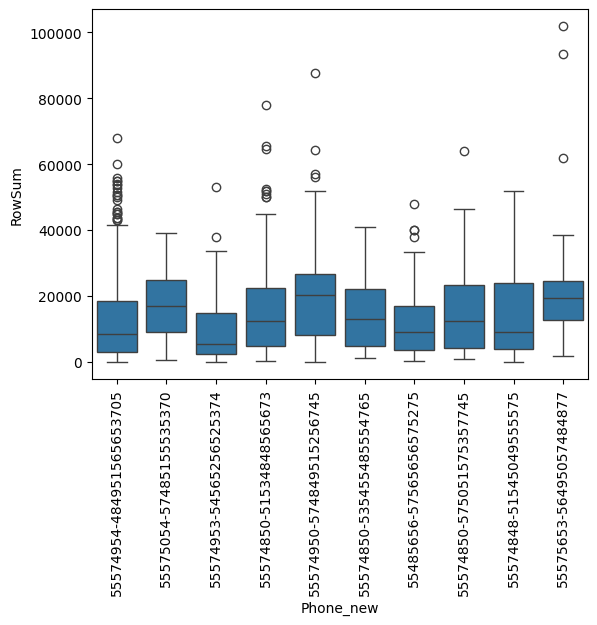

In [93]:
# Так как клиентов слишком много, чтобы не перегрузить график, выбираем топ-10 клиентов по количеству заказов:
top_clients = df['Phone_new'].value_counts().nlargest(10).index
df_top = df[df['Phone_new'].isin(top_clients)]

# Построение графика Box Whiskers
sns.boxplot(x='Phone_new', y='RowSum', data=df_top)
plt.xticks(rotation=90)
plt.show()

# **Витрина**

In [94]:
#загрузка очищенных данных
#df_clean = pd.read_excel('/content/df_paid_10.10.xlsx')
df_clean = df_paid

In [95]:
df = df_clean

In [96]:
#df.to_csv('output.csv', index=False)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127602 entries, 28 to 357024
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order_ID      127602 non-null  object        
 1   Phone_new     127602 non-null  object        
 2   Source        127602 non-null  object        
 3   OrderDate     127602 non-null  datetime64[ns]
 4   месяц         127602 non-null  int64         
 5   DeliveryDate  127602 non-null  object        
 6   PaymentDate   127602 non-null  object        
 7   OneClick      127602 non-null  int64         
 8   DeliveryType  127588 non-null  object        
 9   PaymentType   127602 non-null  object        
 10  Region        127602 non-null  object        
 11  Area          127326 non-null  object        
 12  Store_ID      127602 non-null  int64         
 13  FullSum       127602 non-null  float64       
 14  IM_Rozn_Sum   127602 non-null  float64       
 15  Nom_Name      127589 

In [98]:
group_Source = df.groupby(['Phone_new', 'Source'])[['Order_ID', 'FullSum', 'Quant', 'Week', 'OneClick']].sum()
group_PaymentType = df.groupby(['Phone_new', 'PaymentType'])[['Order_ID', 'IM_Rozn_Sum', 'RowSum', 'Quant']].sum()
group_Region = df.groupby(['Phone_new', 'Region'])[['FullSum', 'Store_ID', 'Quant']].sum()
group_TN = df.groupby(['Phone_new', 'TN'])[['Quant', 'RowSum']].sum()

In [99]:
# Группировка по среднему значению для числовых столбцов
group_Phone_mean = df.groupby('Phone_new').mean(numeric_only=True)

# Группировка по количеству записей
group_Phone_count = df.groupby('Phone_new').size().reset_index(name='count')

In [100]:
#создание датафрейма для записи информации по клиентам
data_clients = pd.DataFrame()
data_clients['id'] = df.drop_duplicates(subset = 'Phone_new')['Phone_new']
data_clients = data_clients.reset_index(drop=True)

In [101]:
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88873 entries, 0 to 88872
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      88873 non-null  object
dtypes: object(1)
memory usage: 694.4+ KB


#Categorical features

In [102]:
def add_categorical_features(data_clients, df, group_data, column):
    for i in df[column].dropna().unique():  # Исключаем NaN, если есть
        data_clients[i] = i
        data_clients = data_clients.merge(group_data['Quant'], 
                                          left_on=['id', i], 
                                          right_on=['Phone_new', column], 
                                          how='left')
        data_clients.drop(columns=[i], inplace=True)
        data_clients.rename(columns={'Quant': i}, inplace=True)
        data_clients.fillna(0, inplace=True)
    return data_clients

# Создаём датафрейм data_clients с уникальными клиентами
data_clients = pd.DataFrame({'id': df['Phone_new'].drop_duplicates().reset_index(drop=True)})

# Добавляем признаки по группам
data_clients = add_categorical_features(data_clients, df, group_TN, 'TN')
data_clients = add_categorical_features(data_clients, df, group_Source, 'Source')
data_clients = add_categorical_features(data_clients, df, group_PaymentType, 'PaymentType')
data_clients = add_categorical_features(data_clients, df, group_Region, 'Region')


In [103]:
#добавление основных столбцов с суммами и к-вом товаров

# Выбираем только числовые столбцы для суммирования
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
grouped = df.groupby('Phone_new')[numeric_cols].sum().reset_index()

data_clients = data_clients.merge(
    grouped,
    left_on='id',
    right_on='Phone_new',
    how='left'
)
data_clients.drop('Phone_new', axis=1, inplace=True)

In [104]:
data_clients.head()

,id,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,месяц,OneClick,Store_ID,FullSum,IM_Rozn_Sum,Quant,RowSum,Week
0,55575449-54535553535073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,201603,0,3518,2420.0,2420.0,1.0,2420.0,9.0
1,55574954-53565052504871,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,201603,0,2656,8999.0,8999.0,1.0,8999.0,9.0
2,55575049-51505248534972,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,201603,0,3244,1790.0,1790.0,1.0,1790.0,9.0
3,55574954-53495654564877,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,201603,0,3695,1420.0,1420.0,1.0,1420.0,9.0
4,55575054-53544849485671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,201603,0,3344,249.0,249.0,1.0,249.0,9.0


In [105]:
data_clients.rename(columns = {'Quant' : 'КОЛ-ВО ВЫКУПЛ.ТОВ.'}, inplace = True) 
data_clients.rename(columns = {'RowDiscount' : 'СУММА СКИДКИ'}, inplace = True) 

In [106]:
#добавляем столбец с количеством чеков
order_count = df.groupby('Phone_new')['Order_ID'].nunique().reset_index(name='Total_Orders')

data_clients = data_clients.merge(
    order_count,
    left_on='id',
    right_on='Phone_new',
    how='left'
)

data_clients.drop('Phone_new', axis=1, inplace=True, errors='ignore')

In [107]:
data_clients = data_clients.rename(columns={'RowSum':'КОЛ-ВО ЧЕКОВ'})
#среднее кол-во товаров в чеке
data_clients['СРЕД.КОЛ.ТОВ.вЧеке'] = data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.'] / data_clients['КОЛ-ВО ЧЕКОВ']

In [108]:
# Считаем сумму RowSum для каждого заказа (исключая нечисловые столбцы)
order_sum = (
    df.groupby(['Phone_new', 'Order_ID'])
    .sum(numeric_only=True)['RowSum']  # Только числовые данные
    .reset_index(name='Order_Sum')
)

# Считаем средний чек по клиенту
avg_check = (
    order_sum.groupby('Phone_new')['Order_Sum']
    .mean()
    .reset_index(name='СРЕДНИЙ ЧЕК')
)

# 3. Объединяем с data_clients
data_clients = data_clients.merge(
    avg_check,
    left_on='id',
    right_on='Phone_new',
    how='left'
)

data_clients.drop('Phone_new', axis=1, inplace=True, errors='ignore')

In [109]:
#перезаполняем столбцы TN долями вместо кол-ва
data_clients['Аксессуары'] = data_clients['Аксессуары'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Крупная бытовая техника'] = data_clients['Крупная бытовая техника'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Цифровая Техника'] = data_clients['Цифровая Техника'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Мелкая бытовая техника'] = data_clients['Мелкая бытовая техника'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['ТВ-Аудио'] = data_clients['ТВ-Аудио'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Мебель'] = data_clients['Мебель'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Детские товары'] = data_clients['Детские товары'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Спорт и активный отдых'] = data_clients['Спорт и активный отдых'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Сделай сам'] = data_clients['Сделай сам'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Климат'] = data_clients['Климат'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Игры, софт и развлечения'] = data_clients['Игры, софт и развлечения'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Товары для дома'] = data_clients['Товары для дома'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Автотовары'] = data_clients['Автотовары'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']
data_clients['Элитная техника'] = data_clients['Элитная техника'] / data_clients['КОЛ-ВО ВЫКУПЛ.ТОВ.']

In [110]:
data_clients.head()

,id,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,месяц,OneClick,Store_ID,FullSum,IM_Rozn_Sum,КОЛ-ВО ВЫКУПЛ.ТОВ.,КОЛ-ВО ЧЕКОВ,Week,Total_Orders,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
0,55575449-54535553535073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,201603,0,3518,2420.0,2420.0,1.0,2420.0,9.0,1,0.000413,2420.0
1,55574954-53565052504871,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,201603,0,2656,8999.0,8999.0,1.0,8999.0,9.0,1,0.000111,8999.0
2,55575049-51505248534972,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,201603,0,3244,1790.0,1790.0,1.0,1790.0,9.0,1,0.000559,1790.0
3,55574954-53495654564877,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,201603,0,3695,1420.0,1420.0,1.0,1420.0,9.0,1,0.000704,1420.0
4,55575054-53544849485671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,201603,0,3344,249.0,249.0,1.0,249.0,9.0,1,0.004016,249.0


In [111]:
# Recency
max_date = pd.to_datetime("30.04.2016", format="%d.%m.%Y")
last_purchase = df.groupby('Phone_new')['OrderDate'].max().reset_index()
last_purchase['Recency'] = (max_date - last_purchase['OrderDate']).dt.days
data_clients = data_clients.merge(last_purchase[['Phone_new', 'Recency']], left_on='id', right_on='Phone_new', how='left')
data_clients.drop('Phone_new', axis=1, inplace=True, errors='ignore')

In [112]:
# time since first purchase
first_purchase = df.groupby('Phone_new')['OrderDate'].min().reset_index()
first_purchase['TimeSinceFirstPurchase'] = (max_date - first_purchase['OrderDate']).dt.days
data_clients = data_clients.merge(first_purchase[['Phone_new', 'TimeSinceFirstPurchase']], left_on='id', right_on='Phone_new', how='left')
data_clients.drop('Phone_new', axis=1, inplace=True, errors='ignore')

In [113]:
# Если клиент совершил более одного заказа
repeat_flag = df.groupby('Phone_new')['Order_ID'].nunique().reset_index(name='TotalOrders')
repeat_flag['Is_Repeat'] = (repeat_flag['TotalOrders'] > 1).astype(int)

data_clients = data_clients.merge(
    repeat_flag[['Phone_new', 'Is_Repeat']],
    left_on='id',
    right_on='Phone_new',
    how='left'
)
data_clients.drop('Phone_new', axis=1, inplace=True, errors='ignore')

In [114]:
data_clients.set_index('id', inplace = True)
data_clients = data_clients.drop(columns=['месяц', 'Week', 'FullSum', 'IM_Rozn_Sum', 'Total_Orders', 'Store_ID'])

In [115]:
data_clients.head()

,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,OneClick,КОЛ-ВО ВЫКУПЛ.ТОВ.,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,TimeSinceFirstPurchase,Is_Repeat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55575449-54535553535073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,2420.0,0.000413,2420.0,60,60,0
55574954-53565052504871,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,8999.0,0.000111,8999.0,60,60,0
55575049-51505248534972,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1790.0,0.000559,1790.0,60,60,0
55574954-53495654564877,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1420.0,0.000704,1420.0,60,60,0
55575054-53544849485671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,249.0,0.004016,249.0,60,60,0


In [116]:
df1 = data_clients

# **Корреляция**

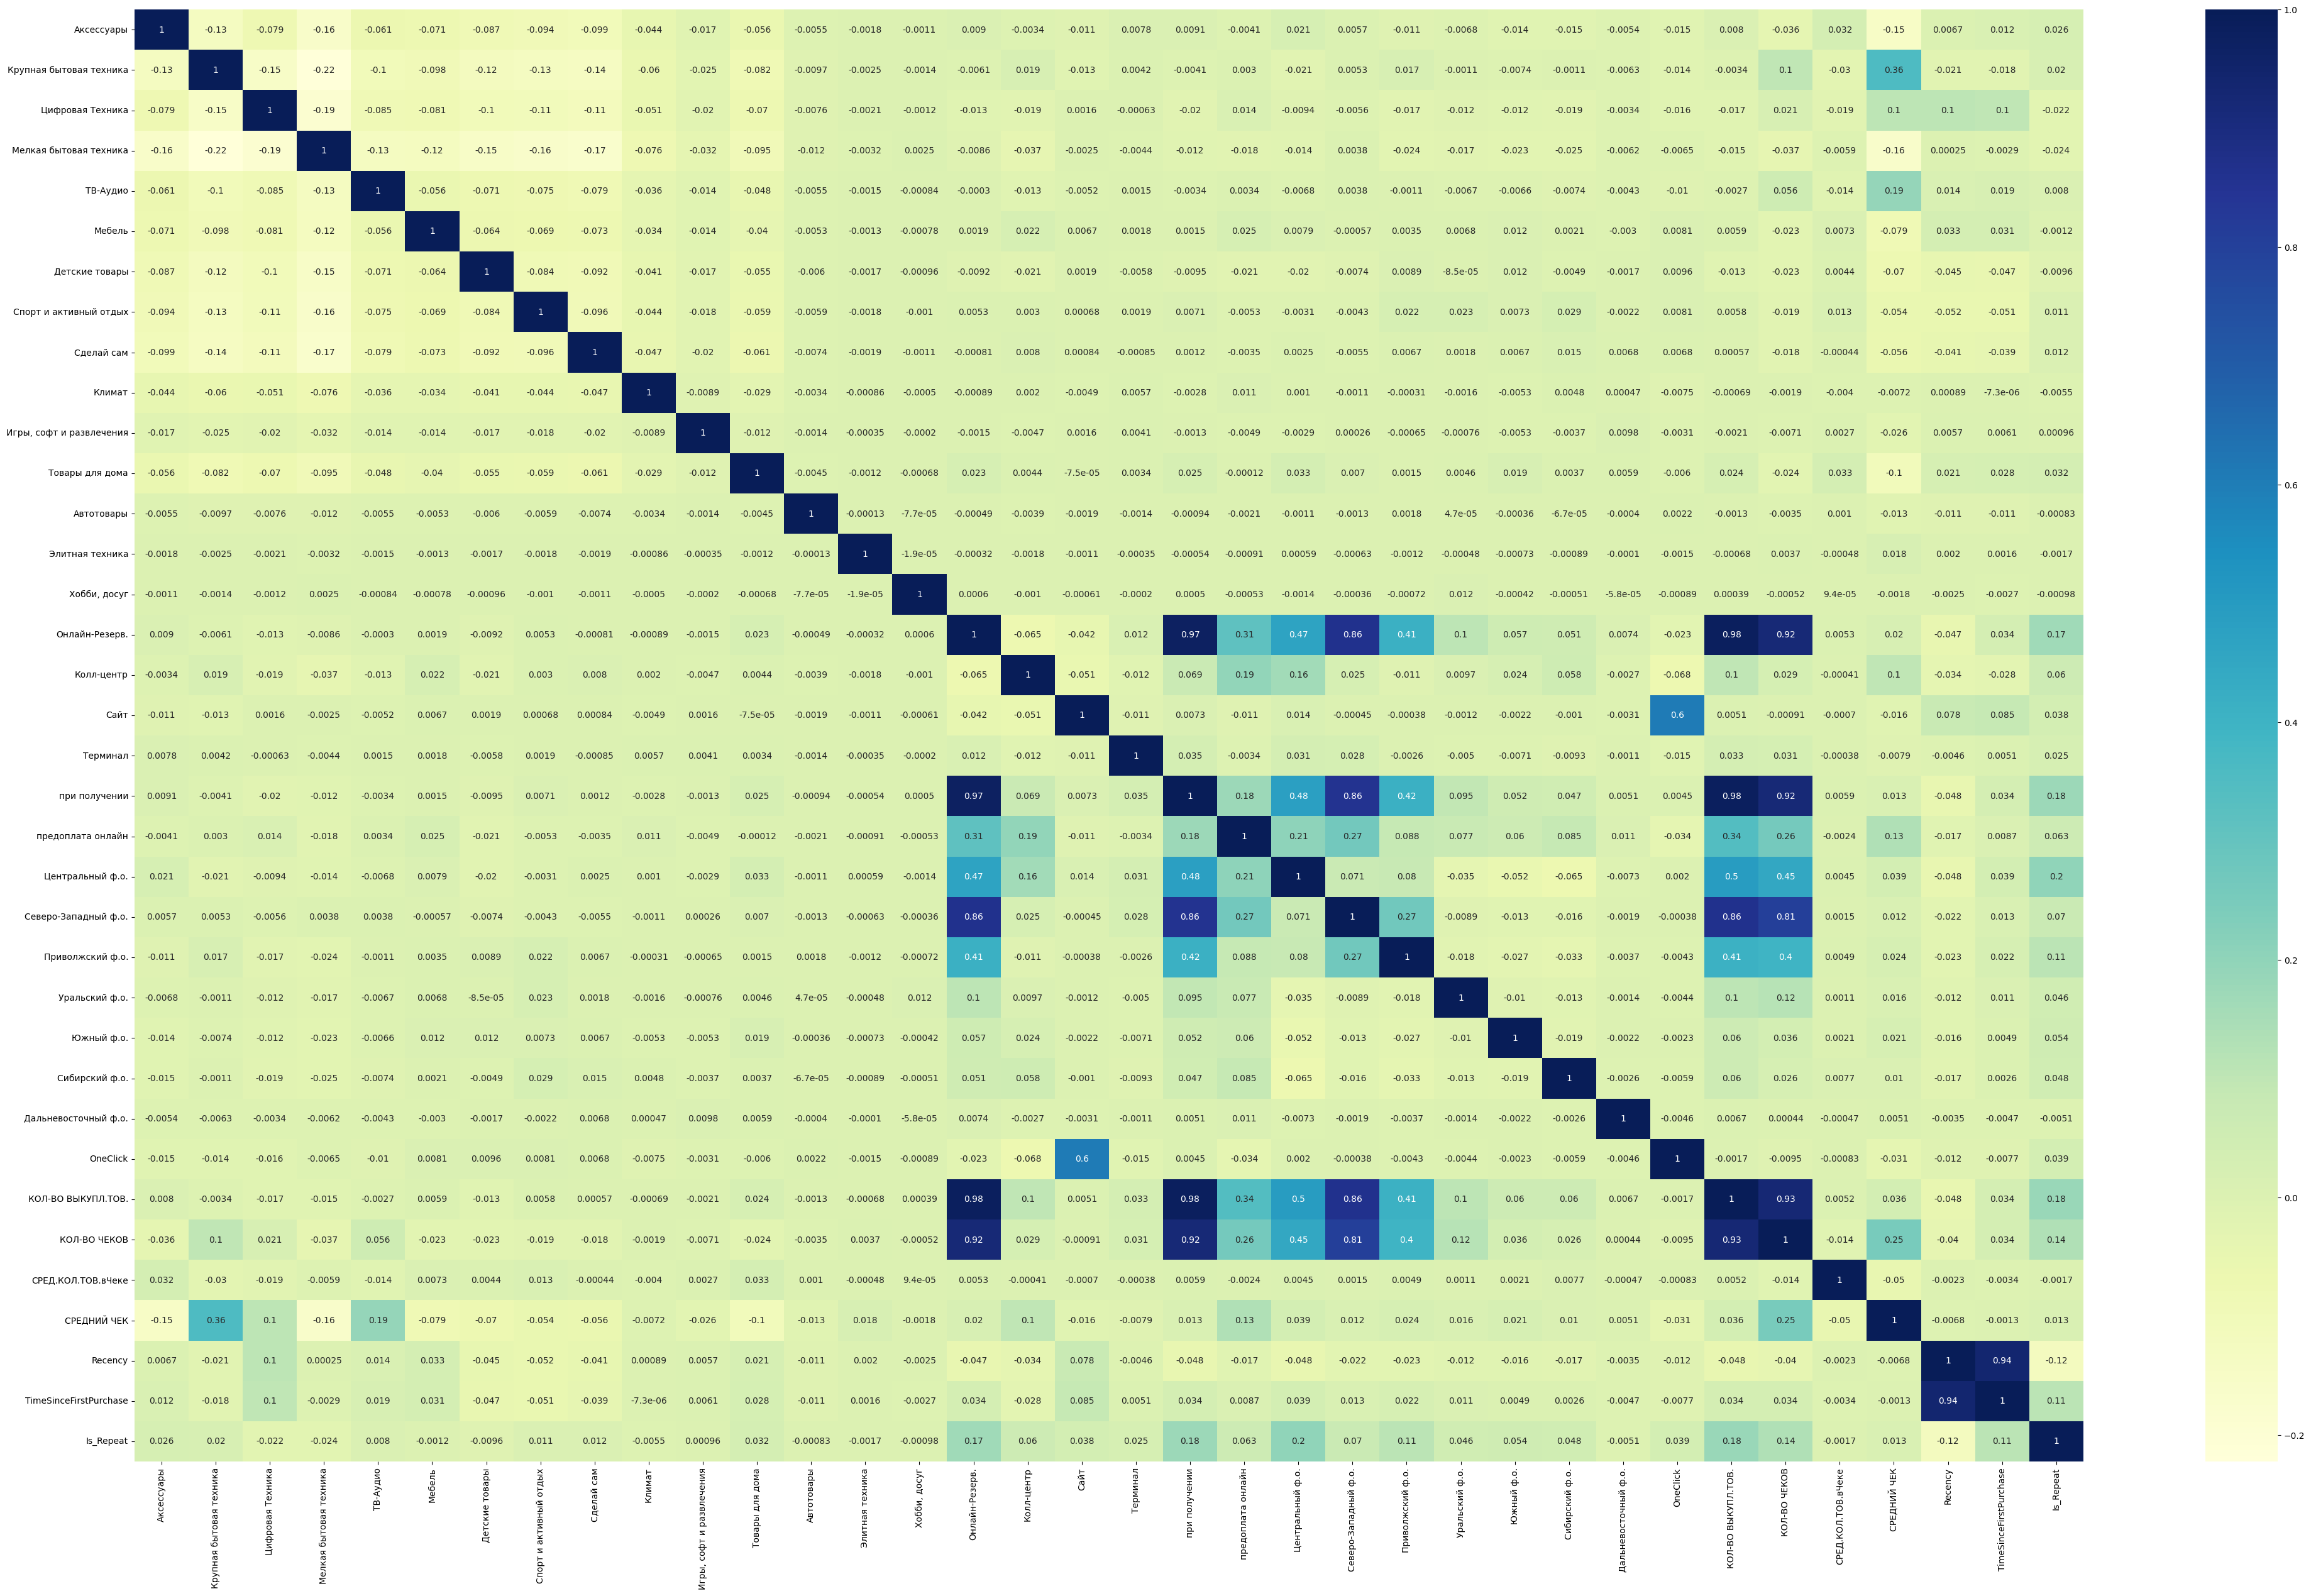

In [117]:
fig = plt.figure(figsize = (50, 30))
sns.heatmap(df1.corr(), annot=True, cmap = 'YlGnBu');

In [118]:
corr = df1.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,OneClick,КОЛ-ВО ВЫКУПЛ.ТОВ.,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,TimeSinceFirstPurchase,Is_Repeat
Аксессуары,1.000000,-0.114346,-0.010698,-0.138760,-0.015612,-0.066529,-0.085517,-0.091674,-0.088905,-0.035251,-0.006223,-0.031983,-0.002197,-0.001941,-0.001121,0.101682,-0.017241,-0.011355,0.005780,0.120530,-0.012732,0.063113,0.025248,-0.025102,-0.010817,-0.026187,-0.022280,-0.006440,-0.017131,0.134321,-0.206149,0.257113,-0.230288,-0.003798,0.026435,0.094077
Крупная бытовая техника,-0.114346,1.000000,-0.145603,-0.207690,-0.076324,-0.095620,-0.121996,-0.128487,-0.126886,-0.042395,-0.023417,-0.063250,-0.009580,-0.002580,-0.001489,-0.029141,0.056053,-0.009037,0.004233,-0.011871,0.027227,-0.040183,0.026356,0.033387,-0.009927,-0.000562,0.005416,-0.007161,-0.010049,-0.002851,0.423260,-0.425653,0.421423,-0.035488,-0.011030,0.074839
Цифровая Техника,-0.010698,-0.145603,1.000000,-0.182686,-0.066877,-0.080152,-0.101250,-0.103588,-0.110268,-0.042911,-0.015123,-0.062858,-0.006333,-0.002163,-0.001249,0.005664,-0.015534,0.007078,0.000846,-0.030258,0.053451,0.025759,-0.002366,-0.015039,-0.019260,-0.008955,-0.015502,-0.000728,-0.013709,-0.007183,0.173405,-0.170213,0.168795,0.090211,0.109415,0.036924
Мелкая бытовая техника,-0.138760,-0.207690,-0.182686,1.000000,-0.112609,-0.122282,-0.152508,-0.161352,-0.169582,-0.064012,-0.031971,-0.064572,-0.010977,-0.003282,0.004480,0.019341,-0.033694,0.002256,-0.004566,0.003950,-0.022727,0.012398,0.039246,-0.029644,-0.029260,-0.023438,-0.023643,-0.005412,-0.001239,-0.010585,-0.144004,0.135582,-0.154886,-0.011159,0.007282,0.031155
ТВ-Аудио,-0.015612,-0.076324,-0.066877,-0.112609,1.000000,-0.051984,-0.069908,-0.071241,-0.071171,-0.022767,-0.007619,-0.033963,-0.004519,-0.001532,-0.000884,0.024045,-0.001486,-0.003020,0.002071,0.011212,0.027762,0.003857,0.015829,0.002107,-0.010467,-0.008805,-0.006794,-0.005081,-0.009900,0.024263,0.189279,-0.182382,0.179963,-0.002957,0.029817,0.079528
Мебель,-0.066529,-0.095620,-0.080152,-0.122282,-0.051984,1.000000,-0.062310,-0.065922,-0.067194,-0.032607,-0.013074,-0.017053,-0.005830,-0.001414,-0.000816,0.050812,0.022615,0.003221,0.000432,0.066867,0.040683,0.024482,-0.005823,-0.001409,0.018195,0.016836,0.004065,-0.002241,0.006163,0.107820,-0.066177,0.104734,-0.075323,0.027304,0.036668,0.032813
Детские товары,-0.085517,-0.121996,-0.101250,-0.152508,-0.069908,-0.062310,1.000000,-0.079159,-0.089201,-0.037172,-0.017825,-0.047491,-0.005399,-0.001703,-0.000983,0.014747,-0.019532,0.006925,-0.005618,0.015813,-0.027725,-0.012153,-0.031129,0.030972,0.017111,0.035757,0.002732,0.002439,0.016933,-0.001068,-0.035689,0.036102,-0.041194,-0.053682,-0.044428,0.020482
Спорт и активный отдых,-0.091674,-0.128487,-0.103588,-0.161352,-0.071241,-0.065922,-0.079159,1.000000,-0.088961,-0.041192,-0.018053,-0.049060,-0.004499,-0.001829,-0.001056,0.041410,0.004972,0.004037,0.001851,0.061287,-0.010420,-0.010767,-0.022025,0.025229,0.039781,0.014203,0.029744,-0.000361,0.010570,0.061603,-0.044025,0.069110,-0.054981,-0.059690,-0.044750,0.047747
Сделай сам,-0.088905,-0.126886,-0.110268,-0.169582,-0.071171,-0.067194,-0.089201,-0.088961,1.000000,-0.039361,-0.018578,-0.040715,-0.006701,-0.001963,-0.001133,0.031664,0.011948,0.002736,0.000331,0.046147,-0.003311,0.014495,-0.025229,0.003684,0.013520,0.007749,0.023269,0.012960,0.010845,0.050338,0.000300,0.024329,-0.013199,-0.052821,-0.031308,0.061095
Климат,-0.035251,-0.042395,-0.042911,-0.064012,-0.022767,-0.032607,-0.037172,-0.041192,-0.039361,1.000000,-0.006454,-0.015007,-0.003766,-0.000913,-0.000527,0.028618,0.001802,-0.004786,0.004570,0.0263

Сильные корреляции (выше 0.7):
СРЕД.КОЛ.ТОВ.вЧеке и СРЕДНИЙ ЧЕК:
Корреляция -0.958 — сильная обратная связь. Это может означать, что чем больше товаров в чеке, тем ниже средний чек (например, из-за скидок на крупные покупки).

КОЛ-ВО ЧЕКОВ и СРЕДНИЙ ЧЕК:
Корреляция 0.981 — почти полная прямая зависимость.

Recency и TimeSinceFirstPurchase:
Корреляция 0.940 — очень сильная прямая связь. Это логично: чем дольше клиент существует в системе, тем больше времени прошло с его последней покупки.

Онлайн-резерв и колл-центр:
Корреляция -0.625 — клиенты, использующие онлайн-резерв, реже обращаются в колл-центр. Это может указывать на разные сегменты аудитории.

при получении и КОЛ-ВО ВЫКУПЛ.ТОВ.:
Корреляция 0.793 — клиенты, забирающие товары самостоятельно, чаще выкупают больше товаров. Возможно, это связано с удобством самовывоза.

OneClick и Сайт:
Корреляция 0.617 — использование OneClick связано с активностью на сайте. Это может говорить о технологически продвинутых клиентах.

Слабые корреляции близкие к 0:
Хобби, досуг и большинство других признаков — слабая связь. Это может означать, что данная категория товаров не влияет на поведение клиентов.

# **Outliers removing**

In [119]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [120]:
%%time
outliers = IsolationForest(n_estimators=20, random_state=0).fit_predict(df1.values)  # fit 3 trees  
outliers = (outliers+1)//2

print(outliers)  # Выведем результаты работы модели IsolationForest
print(np.sum(outliers == 1))  # Количество нормальных точек
print(np.sum(outliers == 0))  # Количество выбросов

print('% of outliers with Isolation forest:', 1 - (np.sum(outliers) / df1.shape[0]))

[1 1 1 ... 1 1 1]
85914
2959
% of outliers with Isolation forest: 0.03329470142788027
CPU times: user 94.2 ms, sys: 7.85 ms, total: 102 ms
Wall time: 104 ms


In [121]:
df1.shape

(88873, 36)

In [122]:
df2 = df1.loc[np.array(df1.index)[outliers == 1]]

In [123]:
df2.shape

(85914, 36)

In [124]:
df3 = df2.reset_index().drop(columns=['id'])

In [125]:
df3

,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,OneClick,КОЛ-ВО ВЫКУПЛ.ТОВ.,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,TimeSinceFirstPurchase,Is_Repeat
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,2420.0,0.000413,2420.0,60,60,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,8999.0,0.000111,8999.0,60,60,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1790.0,0.000559,1790.0,60,60,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1420.0,0.000704,1420.0,60,60,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,249.0,0.004016,249.0,60,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,1390.0,0.000719,1390.0,0,0,0
85910,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,2.0,21380.0,0.000094,21380.0,0,0,0
85911,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,11370.0,0.000088,11370.0,0,0,0
85912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1149.0,0.001741,1149.0,0,0,0


# **Нормализация**

In [126]:
from sklearn import preprocessing
df_norm = df3.copy()

In [127]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df_norm)

In [128]:
df_norm = pd.DataFrame(X, columns=df3.columns)

df_norm.head()

,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,OneClick,КОЛ-ВО ВЫКУПЛ.ТОВ.,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,TimeSinceFirstPurchase,Is_Repeat
0,3.547491,-0.423576,-0.357682,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.575170,-0.018258,-0.576144,1.627228,1.585121,-0.257027
1,-0.313498,2.474572,-0.357682,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,-0.862067,1.109722,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.046798,-0.067263,0.003295,1.627228,1.585121,-0.257027
2,-0.313498,-0.423576,2.967562,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.625766,0.005335,-0.631630,1.627228,1.585121,-0.257027
3,-0.313498,-0.423576,-0.357682,1.978277,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-1.407811,1.459958,-0.159739,-0.068312,-0.315853,-0.234034,-0.862067,1.109722,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.655481,0.028948,-0.664218,1.627228,1.585121,-0.257027
4,-0.313498,-0.423576,-0.357682,-0.545988,4.279465,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.749526,0.566181,-0.767353,1.627228,1.585121,-0.257027


In [129]:
# После StandardScaler:
print("Среднее после стандартизации:", np.mean(X, axis=0))  # Должно быть ~ [0, 0, ..., 0]
print("Стандартное отклонение:", np.std(X, axis=0))         # Должно быть ~ [1, 1, ..., 1]

Среднее после стандартизации: [ 2.77885280e-17  4.03595287e-17  8.32001760e-17 -1.32326324e-17
  3.56454034e-17  3.90362655e-17  1.98489486e-18 -5.72518110e-17
 -1.02552901e-16  5.06148188e-17 -1.17439612e-17 -5.77273587e-17
 -1.03379940e-17  2.15030276e-18  3.22545414e-18 -2.28262908e-17
  4.96223714e-18  3.70513706e-17  3.07658703e-17  8.99819001e-17
  5.25170097e-18 -2.31571066e-17 -7.49297808e-17 -3.07658703e-17
 -2.82020477e-17  4.61488054e-17  6.44263788e-17 -3.01869426e-18
  2.69614884e-17  1.72024221e-17 -2.18338434e-17  1.24469448e-17
 -6.33512275e-17  1.58791588e-16 -1.69377694e-16  3.30815809e-17]
Стандартное отклонение: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# **K - means**

In [1]:
from sklearn.cluster import KMeans #DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist
df = df_norm

NameError: name 'df_norm' is not defined

## Метод локтя

In [131]:
from sklearn.cluster import KMeans
# k means determine k
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
    print('{} / {}'.format(k,K[-1]))

1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15


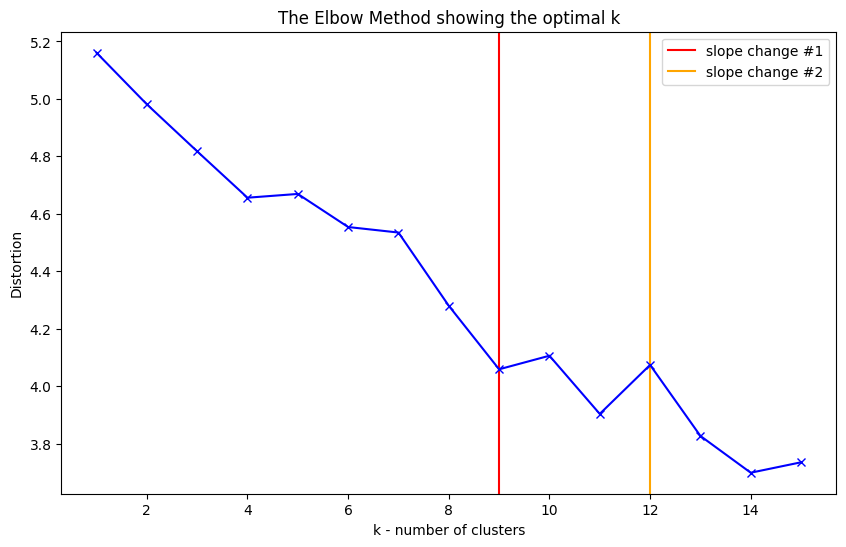

In [132]:
#определение оптимального к-ва кластеров методом локтя
plt.figure(figsize=(10, 6))
plt.axvline(9, 0, 1, label='slope change #1', color='red')
plt.axvline(12, 0, 1, label='slope change #2', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

Перегибы: 4, 6, 9, 11, 14
Самые оптимальные: 9 и 12 кластеров

## Дэвис-Боулдинг

In [133]:
from sklearn.metrics import davies_bouldin_score
results_db_kmeans = {}
for i in range(2, 16):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

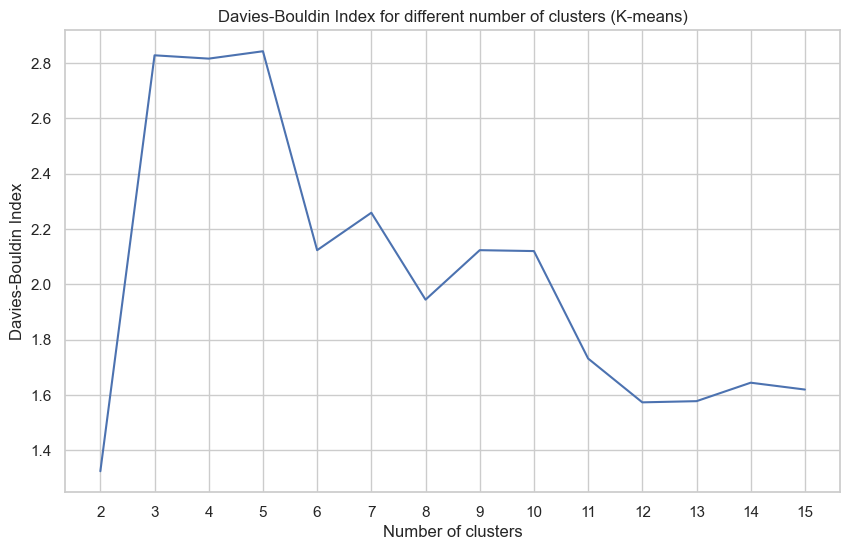

In [134]:
sns.set_theme(style="whitegrid")  # Установка стиля через seaborn

plt.figure(figsize=(10, 6))
plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))
plt.xticks(np.arange(2, 16, step=1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for different number of clusters (K-means)')
plt.show()

## Силуэт

## Калински-Харабаш

In [135]:
from sklearn.metrics import calinski_harabasz_score

results_ch_kmeans = {}
for i in range(2, 16):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans.update({i: ch_score})

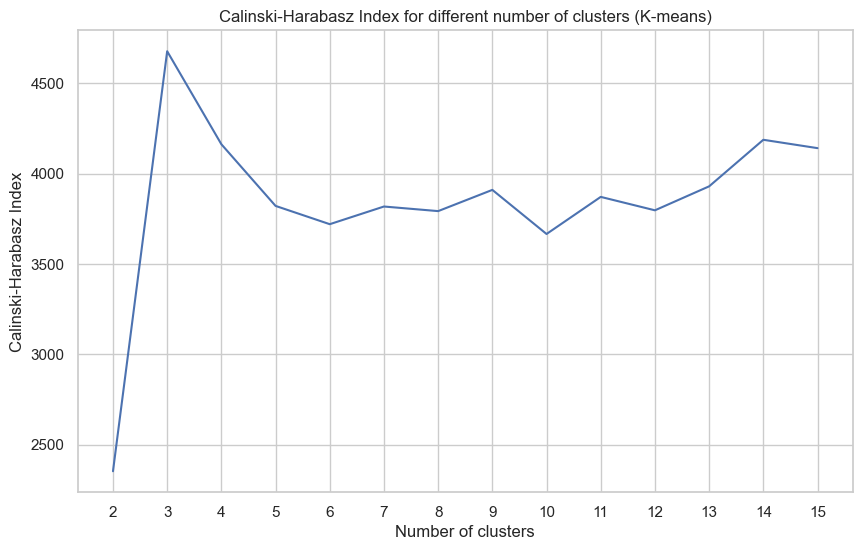

In [136]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (K-means)')
plt.show()

## K-means для 9 кластеров

In [137]:
from sklearn.decomposition import PCA, TruncatedSVD
Y_pca = PCA(n_components=3).fit_transform(X);
Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

In [138]:
K = 9
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X)

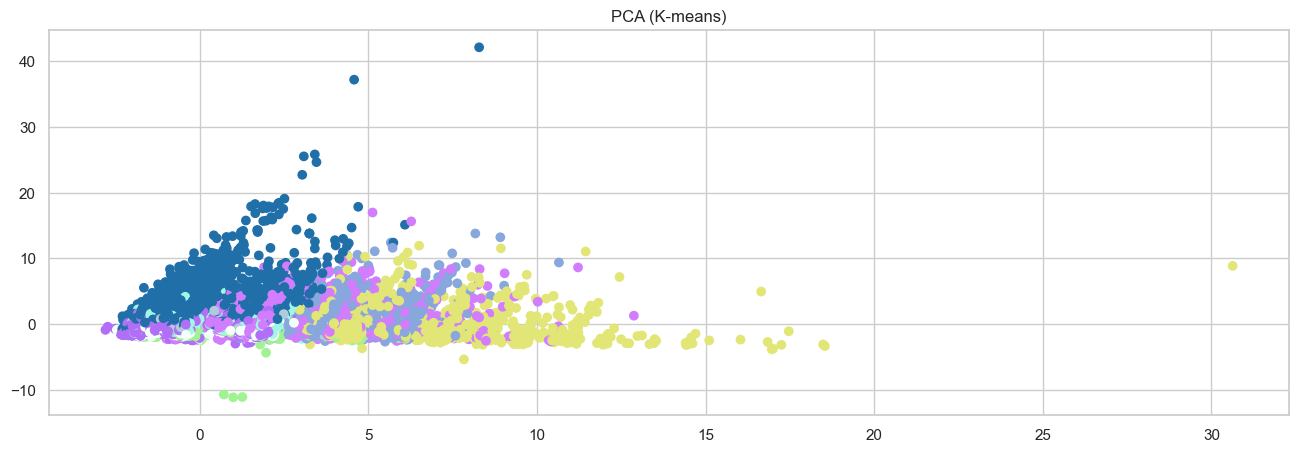

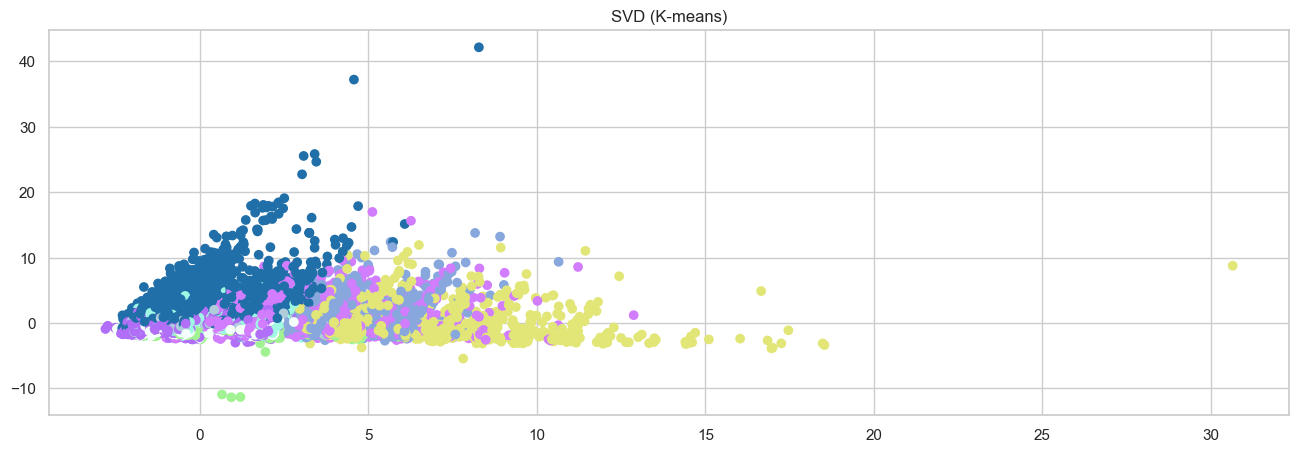

In [139]:
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(16,5));
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

plt.figure(figsize=(16,5)); plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);

In [140]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('df: ', len(df))

Segment 1:  2157
Segment 2:  24491
Segment 3:  5945
Segment 4:  6475
Segment 5:  3496
Segment 6:  3944
Segment 7:  6206
Segment 8:  30500
Segment 9:  2700
df:  85914


In [141]:
print(f'Davies-Boulding Index (n=9): {davies_bouldin_score(X, labels)}')
print(f'Calinski-Harabasz Index (n=9): {calinski_harabasz_score(X, labels)}')

Davies-Boulding Index (n=9): 2.268112677057506
Calinski-Harabasz Index (n=9): 3213.6080478482


In [142]:
df9 = df

## 11 clusters

In [143]:
K = 11
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X)

# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('df: ', len(df))

Segment 1:  24622
Segment 2:  7052
Segment 3:  6479
Segment 4:  8587
Segment 5:  6348
Segment 6:  7313
Segment 7:  11705
Segment 8:  1749
Segment 9:  6080
Segment 10:  1588
Segment 11:  4391
df:  85914


In [144]:
df11 = df

## 12 clusters

In [145]:
K = 12
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X)
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 
# cluster label for each data point
labels = kmeanModel.labels_
df['Labels'] = kmeanModel.labels_
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('Segment 12: ', len(df_12))
print('df: ', len(df))

Segment 1:  5384
Segment 2:  5691
Segment 3:  11385
Segment 4:  2798
Segment 5:  12050
Segment 6:  8192
Segment 7:  2487
Segment 8:  26556
Segment 9:  4230
Segment 10:  6716
Segment 11:  422
Segment 12:  3
df:  85914


In [146]:
df.head()

,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,OneClick,КОЛ-ВО ВЫКУПЛ.ТОВ.,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,TimeSinceFirstPurchase,Is_Repeat,Labels
0,3.547491,-0.423576,-0.357682,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.575170,-0.018258,-0.576144,1.627228,1.585121,-0.257027,0
1,-0.313498,2.474572,-0.357682,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,-0.862067,1.109722,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.046798,-0.067263,0.003295,1.627228,1.585121,-0.257027,2
2,-0.313498,-0.423576,2.967562,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.625766,0.005335,-0.631630,1.627228,1.585121,-0.257027,5
3,-0.313498,-0.423576,-0.357682,1.978277,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-1.407811,1.459958,-0.159739,-0.068312,-0.315853,-0.234034,-0.862067,1.109722,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.655481,0.028948,-0.664218,1.627228,1.585121,-0.257027,7
4,-0.313498,-0.423576,-0.357682,-0.545988,4.279465,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.749526,0.566181,-0.767353,1.627228,1.585121,-0.257027,8


In [147]:
df12 = df

In [148]:
df.groupby('Labels').sum().to_excel('12_klasters.xlsx')

## 13 clusters

In [149]:
K = 13
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X)

# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]
df_13 = df[(df['Labels'] == 12)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('Segment 12: ', len(df_12))
print('Segment 13: ', len(df_13))
print('df: ', len(df))

Segment 1:  5313
Segment 2:  6602
Segment 3:  2287
Segment 4:  5503
Segment 5:  23892
Segment 6:  10309
Segment 7:  4152
Segment 8:  1
Segment 9:  4270
Segment 10:  3240
Segment 11:  1066
Segment 12:  7959
Segment 13:  11320
df:  85914


In [150]:
df.head()

,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Климат,"Игры, софт и развлечения",Товары для дома,Автотовары,Элитная техника,"Хобби, досуг",Онлайн-Резерв.,Колл-центр,Сайт,Терминал,при получении,предоплата онлайн,Центральный ф.о.,Северо-Западный ф.о.,Приволжский ф.о.,Уральский ф.о.,Южный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,OneClick,КОЛ-ВО ВЫКУПЛ.ТОВ.,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,TimeSinceFirstPurchase,Is_Repeat,Labels
0,3.547491,-0.423576,-0.357682,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.575170,-0.018258,-0.576144,1.627228,1.585121,-0.257027,0
1,-0.313498,2.474572,-0.357682,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,-0.862067,1.109722,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.046798,-0.067263,0.003295,1.627228,1.585121,-0.257027,12
2,-0.313498,-0.423576,2.967562,-0.545988,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.625766,0.005335,-0.631630,1.627228,1.585121,-0.257027,11
3,-0.313498,-0.423576,-0.357682,1.978277,-0.248716,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-1.407811,1.459958,-0.159739,-0.068312,-0.315853,-0.234034,-0.862067,1.109722,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.655481,0.028948,-0.664218,1.627228,1.585121,-0.257027,4
4,-0.313498,-0.423576,-0.357682,-0.545988,4.279465,-0.226853,-0.286305,-0.305306,-0.327261,-0.148186,-0.059943,-0.196855,-0.023252,-0.005909,-0.003412,-0.094229,-0.375248,-0.159739,-0.068312,-0.315853,-0.234034,0.338471,-0.503405,-0.314989,-0.15405,-0.163892,-0.199903,-0.017836,-0.254854,-0.480685,-0.749526,0.566181,-0.767353,1.627228,1.585121,-0.257027,6


In [151]:
df13 = df

In [152]:
df.groupby('Labels').sum().to_excel('13_klasters.xlsx')

# **Кластеризация Expectation-Maximization Algorithm(EM-кластеризация)**

In [153]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

### Дэвис Боулдинг

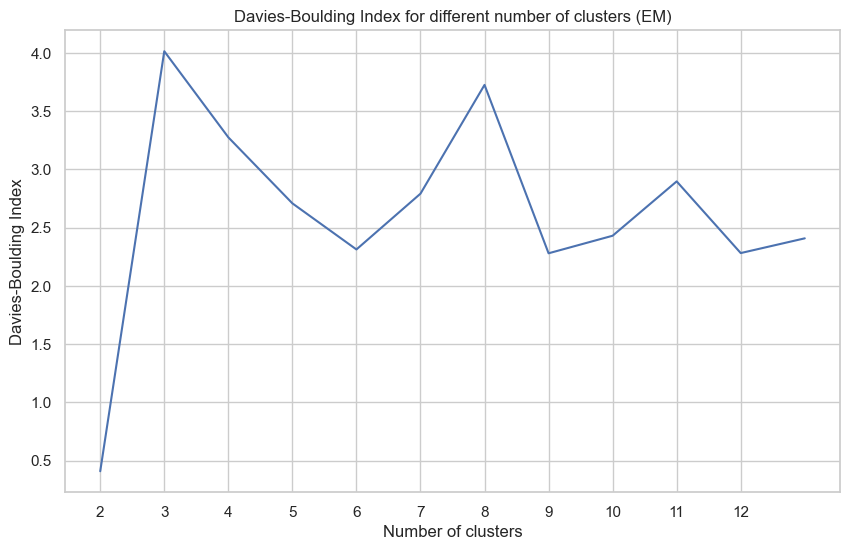

In [154]:
results_ch_em = {}
for i in range(2, 14):
    
    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)
    
    ch_score = metrics.davies_bouldin_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

### Калински-Харабаш

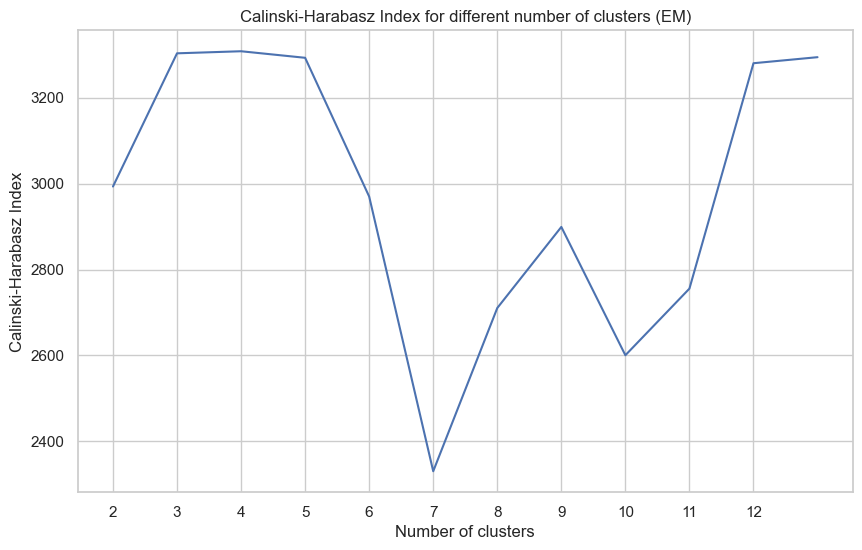

In [155]:
results_ch_em = {}
for i in range(2, 14):
    
    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)
    
    ch_score = metrics.calinski_harabasz_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

### EM для 9 кластеров

In [156]:
df = df_norm
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(df.iloc[:,1:])

In [157]:
import scipy
scipy.stats.normaltest(X)

NormaltestResult(statistic=array([ 29568.36522458,  41512.77661337,  15996.36371597,  66748.90966931,
        74319.30806027,  56252.5084177 ,  52068.17516678,  47039.87959768,
       103533.70619025, 172928.92544386,  84407.77309124, 259379.17855001,
       400179.49644556, 467525.83667824,  24394.52900923,  84734.59319619,
       106650.15289626, 169905.16116487,  34770.84009407, 126919.55796682,
        37392.53671053,  48102.46406239,  67683.1595251 , 115430.43276412,
       118879.78352687, 103348.99034255, 300482.14601557,  73634.34767857,
        66011.74130287,  87035.37243444, 387102.68301458,  91242.41769559,
       263638.26479035, 245147.81870996,  62027.64248755,  24143.55911889]), pvalue=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]))

In [158]:
Y_pca = PCA(n_components=3).fit_transform(X);
Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

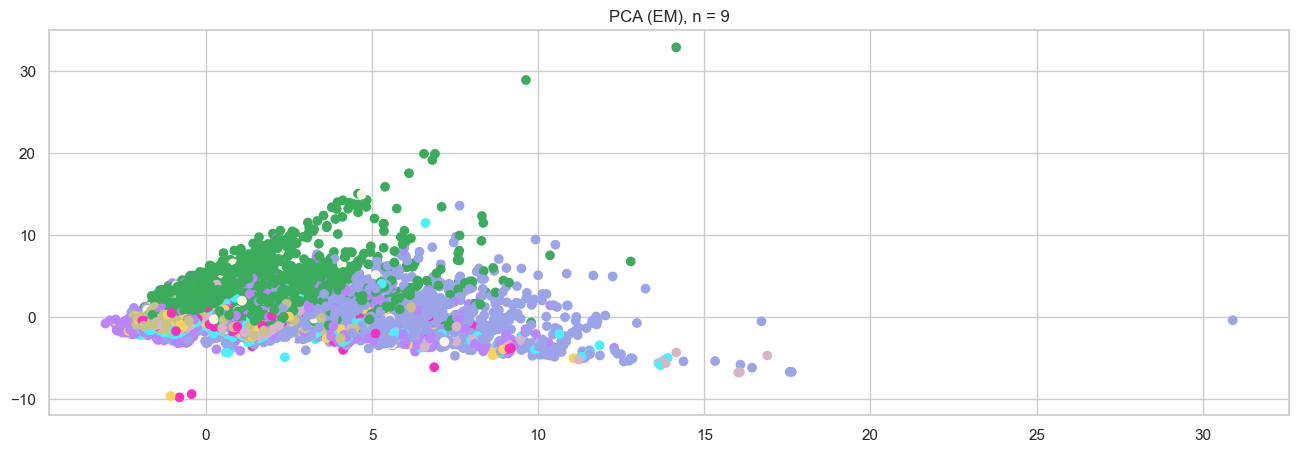

In [159]:
n = 9
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 9')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [160]:
df = df_labels

In [161]:
df_labels.shape

(85914, 1)

In [162]:
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]

data_sel9={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9}

In [163]:
for i in data_sel9.values():
  print(len(i))

24530
7596
5294
6138
7316
1247
19066
6111
8616


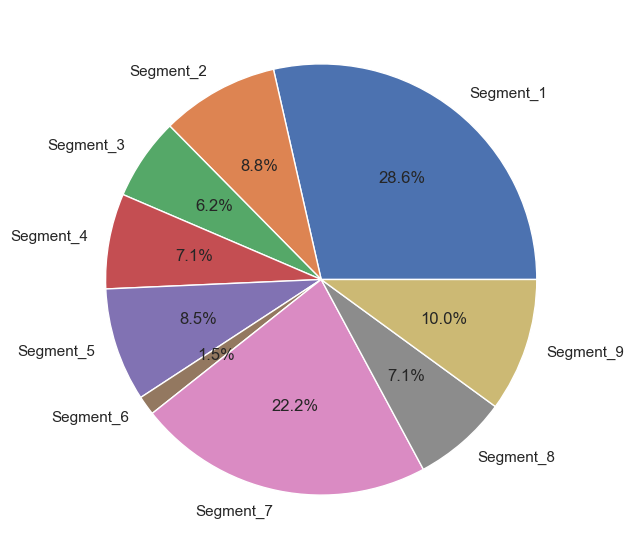

In [164]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel9.values()]
labels = [('Segment_' + str(i)) for i in range(1, 10)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [165]:
df['Labels'] = df_labels['Labels']

In [166]:
df1 = df12

In [ ]:
df_ind = df1

In [ ]:
####################

In [169]:
df = pd.read_excel('111.xlsx', index_col=0)

In [171]:
df.head()

,Order_ID,Source,месяц,DeliveryDate,PaymentDate,OneClick,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,IM_Rozn_Sum,Nom_Name,NomGroup,Quant,RowSum,TN,TK,Week,is_cheap
Phone_new,,,,,,,,,,,,,,,,,,,,,
32565748-000000000,5463964_BX5480645_BX5498188_BX5563863_BX569255...,ТерминалТерминалТерминалТерминалТерминалТермин...,1612828,2016-03-18 00:00:00.0002016-03-20 00:00:00.000...,2016-03-11 19:49:13.0002016-03-13 15:59:10.000...,0,СамовывозСамовывозСамовывозСамовывозСамовывозС...,при получениипри получениипри получениипри пол...,Центральный ф.о.Центральный ф.о.Центральный ф....,МоскваМоскваМоскваМоскваМоскваТверская обл.Мос...,27002,19757.0,39514.0,Мышь Defender Redragon LavawolfБритва Remingto...,Игровые мышиЭлектробритвыАвтомобильные колонки...,8,19757,АксессуарыМелкая бытовая техникаТВ-АудиоДетски...,Аксессуары для комп./ноутбуков/принтеровКрасот...,105,0
32565750-575448565151 а,5626508_BX5626508_BX,Колл-центрКолл-центр,403206,1900-01-01 00:00:00.0001900-01-01 00:00:00.000,2016-03-31 16:29:01.0002016-03-31 16:29:01.000,0,СамовывозСамовывоз,при получениипри получении,Центральный ф.о.Центральный ф.о.,Воронежская обл.Воронежская обл.,6968,53198.0,53198.0,Внеш/блок LG G09VHT.UWE0Внут/блок LG G09VHT.NWE0,Комплектующие кондиционеровКомплектующие конди...,2,26599,КлиматКлимат,КондиционерыКондиционеры,26,0
32565750-575448565151 а5,5729009_BX,Онлайн-Резерв.,201604,2016-04-12 00:00:00.000,2016-04-13 19:48:50.000,0,Самовывоз,при получении,Северо-Западный ф.о.,Ленинградская обл.,3591,1590.0,1590.0,Выпрямитель Polaris PHS 2405K серый,Выпрямители для волос,1,1590,Мелкая бытовая техника,Красота и здоровье,15,0
43553240-575054413251+75,5701149_BX5701214_BX,Онлайн-Резерв.Онлайн-Резерв.,403208,2016-04-09 00:00:00.0002016-04-09 00:00:00.000,2016-04-14 15:48:54.0002016-04-09 19:33:43.000,0,СамовывозСамовывоз,при получениипри получении,Северо-Западный ф.о.Северо-Западный ф.о.,Ленинградская обл.Ленинградская обл.,7330,10129.0,11028.0,Увлажнитель Electrolux EHU-1010Пылесос Philips...,Увлажнители воздухаПылесосы с контейнером для ...,2,10129,КлиматМелкая бытовая техника,УвлажнителиУход за домом,28,0
55445748-514957495657715,5881195_ES,Онлайн-Резерв.,201604,2016-05-09 00:00:00.000,2016-05-09 00:04:18.000,0,Курьерская,при получении,Северо-Западный ф.о.,Ленинградская обл.,2787,27449.0,27449.0,Эл.плита Zanussi ZCV 9553H1W,Электрические плиты,1,27449,Крупная бытовая техника,Плиты,17,0


In [172]:
df['Klaster'] = None

In [173]:
keys = ['id']
df = df.assign(Klaster=df[keys].join(df_ind.drop_duplicates(keys).set_index(keys).Labels, on=keys).Labels)

KeyError: "None of [Index(['id'], dtype='object')] are in the [columns]"